In [ ]:
from pathlib import Path

import util
from util import p_, workflow

import automech

file = util.notebook_file() if util.is_notebook() else __file__
tag = util.file_tag(file)
root_path = Path("..")
par_mech = workflow.read_parent_mechanism(root_path=root_path)

In [ ]:
# # Generate submechanism
# sub_tags = [
#     "A_rh-oh_1e-1_v0",
#     "A_rh-oh_1e-2_v0",
#     "A_rh-oh_2x_v0",
#     "B_rh-ho2_1e-1_v0",
#     "B_rh-ho2_1e-2_v0",
#     "B_rh-ho2_2x_v0",
#     "C_r_1e_v0",
#     "C_r_2x_v0",
#     "C_r_3o_v0",
#     "D_r-o2_1e_v0",
#     "D_r-o2_2x_v0",
#     "D_r-o2_3o_v0",
# ]
# sub_paths = [p_.generated_mechanism(t, "json", p_.data(root_path)) for t in sub_tags]
# sub_mechs = [automech.io.read(p) for p in sub_paths]
# mech = automech.combine_all(sub_mechs)
# mech = automech.drop_duplicate_reactions(mech)
# automech.display(mech)

In [ ]:
# # Prepare calculation
# workflow.prepare_calculation(
#     mech=mech, enant=False, fake_sort=True, tag=tag, root_path=root_path
# )

In [ ]:
# # Prepare simulation
# workflow.prepare_simulation(tag=tag, root_path=root_path)
# workflow.prepare_simulation_species(tag=tag, root_path=root_path)

In [ ]:
# # Check rates
# workflow.plot_rates(tag=tag, root_path=root_path)

In [ ]:
# # Plot simulation
# chart_dct = workflow.plot_simulation(
#     tag=tag,
#     x_col="O2_molecules",
#     root_path=root_path,
#     line_source_=["Hill", "Lokachari"],
#     point_source="Experiment",
#     control=False,
# )
# mech = automech.io.read(
#     p_.full_calculated_mechanism(tag, "json", path=p_.data(root_path))
# )
# for name, chart in chart_dct.items():
#     automech.display_species(mech, [name])
#     chart.show()

In [42]:
# Check TS
from mechdriver.subtasks import display, fs

id_ = "11: 1"

#   - Read in expanded mechanism
mech_path = p_.stereo_mechanism(tag, ext="json", path=p_.data(root_path))
mech = automech.io.read(mech_path)

#   - Display the species/reaction
if ":" in id_:
    automech.display_reactions(mech, chans=[id_])
else:
    automech.display_species(mech, ids=[id_])


*********
Reaction: C5H8(522) + OH(4) = C5H7(1202) + H2O(5)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[OH]']
    products = ['[C]1=CCCC1', 'O']
Rate parameters:
  This work:
    C5H8(522) + OH(4) = C5H7(1202) + H2O(5)                      1.000      0.000      0.000


alt.Chart(...)

In [40]:
#   - Display the TS mode
calc_path = p_.calc(root_path, tag)
display("conf_opt", id_, path=calc_path)

In [ ]:
calc_path = p_.calc(root_path, tag)
display("rpath_scan", id_, path=calc_path)

In [44]:
for path in fs.task_paths("find_ts", id_, path=calc_path):
    print(path)

/lcrc/project/PACC/copan/amech-dev/work/project-cyclopentane/save/RXN/C5H7.H2O/WCTBVYUPUVLFEQ/0_0/2_1/UHFFFAOYSA-N/C5H8.HO/UGZOASBOAAXKSP/0_0/1_2/UHFFFAOYSA-N/2/u-unGOU/TS/00


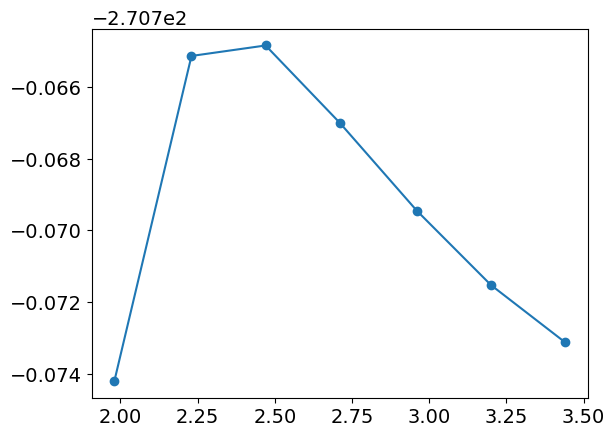

Coordinate 1.98 geometry: 


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Coordinate 2.71 geometry: 


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Coordinate 3.44 geometry: 


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [41]:
#   - Display the TS mode
calc_path = p_.calc(root_path, tag)
display("find_ts", id_, path=calc_path)